In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown

In [5]:
# === Load and Clean Data ===
file_path = "/Users/akkeem/Documents/ClassAssignments/Physics212/Lab6/Experiment6.csv"  # Update path as needed
try:
    df = pd.read_csv(file_path, skip_blank_lines=False, header=None)
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
    exit()

In [6]:
# === Identify section start indices ===
air_to_glass_idx = df[df[0] == "No. of pts"].index[0]
glass_to_air_idx = df[df[0] == "Glass to Air"].index[0] + 1
critical_angle_start = df[df[0] == "Refraction: Critical Angle"].index[0] + 1
critical_angle_end = len(df)

# === Extract and Process Air to Glass Data ===
df_air_to_glass = df.iloc[air_to_glass_idx + 1:glass_to_air_idx - 2].reset_index(drop=True)
df_air_to_glass.columns = df.iloc[air_to_glass_idx]
df_air_to_glass = df_air_to_glass.apply(pd.to_numeric, errors='coerce')


In [7]:
# Recalculate correct sin values
df_air_to_glass["sin i"] = np.sin(np.radians(df_air_to_glass["i"]))
df_air_to_glass["sin r"] = np.sin(np.radians(df_air_to_glass["r"]))

# === Extract and Process Glass to Air Data ===
df_glass_to_air = df.iloc[glass_to_air_idx + 1:critical_angle_start - 2].reset_index(drop=True)
df_glass_to_air.columns = df.iloc[glass_to_air_idx]
df_glass_to_air = df_glass_to_air.apply(pd.to_numeric, errors='coerce')

In [8]:
# Recalculate correct sin values
df_glass_to_air["sin i"] = np.sin(np.radians(df_glass_to_air["i"]))
df_glass_to_air["sin r"] = np.sin(np.radians(df_glass_to_air["r"]))

In [9]:
# === Extract Critical Angle Data ===
critical_angle = df.iloc[critical_angle_start + 1:critical_angle_end].reset_index(drop=True)
critical_angle = critical_angle.drop(columns=[3, 4], errors='ignore')
critical_angle.columns = ["Incident Medium", "Refractive Medium", "Critical Angle (°)"]

In [10]:
# === Preview Cleaned Data ===
display(Markdown("### 📊 Air to Glass Data"))
display(df_air_to_glass)

### 📊 Air to Glass Data

2,No. of pts,i,r,sin i,sin r
0,1,0.0,0.0,0.000000,0.000000
1,2,10.0,6.5,0.173648,0.113203
2,3,20.0,12.0,0.342020,0.207912
3,4,30.0,18.5,0.500000,0.317305
4,5,40.0,24.5,0.642788,0.414693
5,6,50.0,30.0,0.766044,0.500000
6,7,60.0,34.5,0.866025,0.566406
7,8,70.0,38.0,0.939693,0.615661
8,9,80.0,39.5,0.984808,0.636078


In [11]:
display(Markdown("### 📊 Glass to Air Data"))
display(df_glass_to_air)

### 📊 Glass to Air Data

14,No. of pts,i,r,sin i,sin r
0,1,0.0,0.0,0.000000,0.000000
1,2,5.0,7.5,0.087156,0.130526
2,3,10.0,15.5,0.173648,0.267238
3,4,15.0,23.0,0.258819,0.390731
4,5,20.0,30.5,0.342020,0.507538
5,6,25.0,38.5,0.422618,0.622515
6,7,30.0,47.5,0.500000,0.737277
7,8,35.0,57.5,0.573576,0.843391
8,9,40.0,71.0,0.642788,0.945519


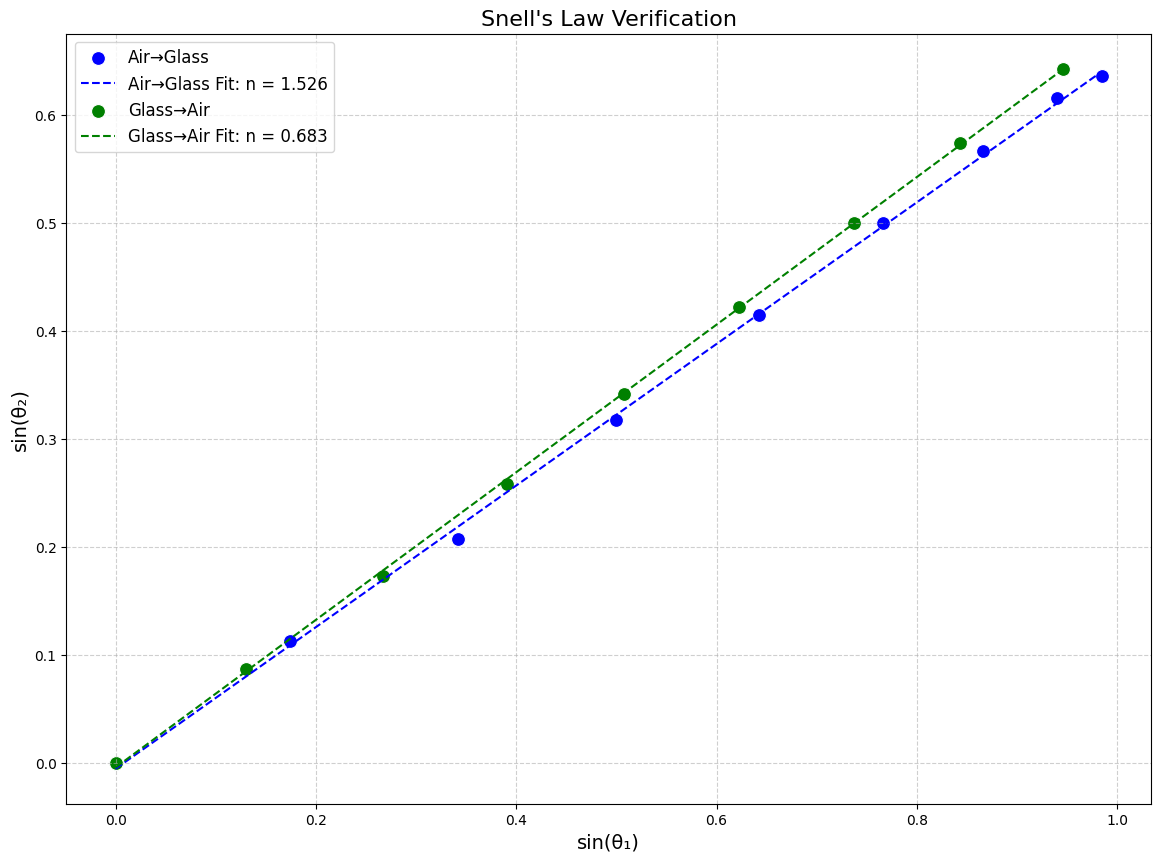

In [12]:
# === Plot Corrected Data with Proper Regression ===
plt.figure(figsize=(14, 10))

# Air to Glass: sin(i) vs sin(r)
x1 = df_air_to_glass['sin i'].values.reshape(-1, 1)  # Correct independent variable
y1 = df_air_to_glass['sin r'].values.reshape(-1, 1)
model1 = LinearRegression().fit(x1, y1)
y1_pred = model1.predict(x1)
n_glass_from_air_to_glass = 1 / model1.coef_[0][0]  # Correct slope interpretation

# Glass to Air: sin(r) vs sin(i)
x2 = df_glass_to_air['sin r'].values.reshape(-1, 1)  # Correct independent variable
y2 = df_glass_to_air['sin i'].values.reshape(-1, 1)
model2 = LinearRegression().fit(x2, y2)
y2_pred = model2.predict(x2)
n_glass_from_glass_to_air = model2.coef_[0][0]  # Correct slope interpretation

# Plotting
sns.scatterplot(data=df_air_to_glass, x='sin i', y='sin r', label='Air→Glass', color='blue', s=100)
plt.plot(x1, y1_pred, color='blue', linestyle='--', 
         label=f'Air→Glass Fit: n = {n_glass_from_air_to_glass:.3f}')

sns.scatterplot(data=df_glass_to_air, x='sin r', y='sin i', label='Glass→Air', color='green', s=100)
plt.plot(x2, y2_pred, color='green', linestyle='--', 
         label=f'Glass→Air Fit: n = {n_glass_from_glass_to_air:.3f}')
plt.title("Snell's Law Verification", fontsize=16)
plt.xlabel("sin(θ₁)", fontsize=14)
plt.ylabel("sin(θ₂)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [13]:
# === Refractive Index Results ===
percent_diff = abs(n_glass_from_air_to_glass - n_glass_from_glass_to_air) / ((n_glass_from_air_to_glass + n_glass_from_glass_to_air)/2) * 100

display(Markdown(rf"""
### 🔍 Final Results:
- **Air→Glass refractive index:** {n_glass_from_air_to_glass:.3f}  
- **Glass→Air refractive index:** {n_glass_from_glass_to_air:.3f}  
- **Percentage difference:** {percent_diff:.2f}%  
"""))


### 🔍 Final Results:
- **Air→Glass refractive index:** 1.526  
- **Glass→Air refractive index:** 0.683  
- **Percentage difference:** 76.31%  


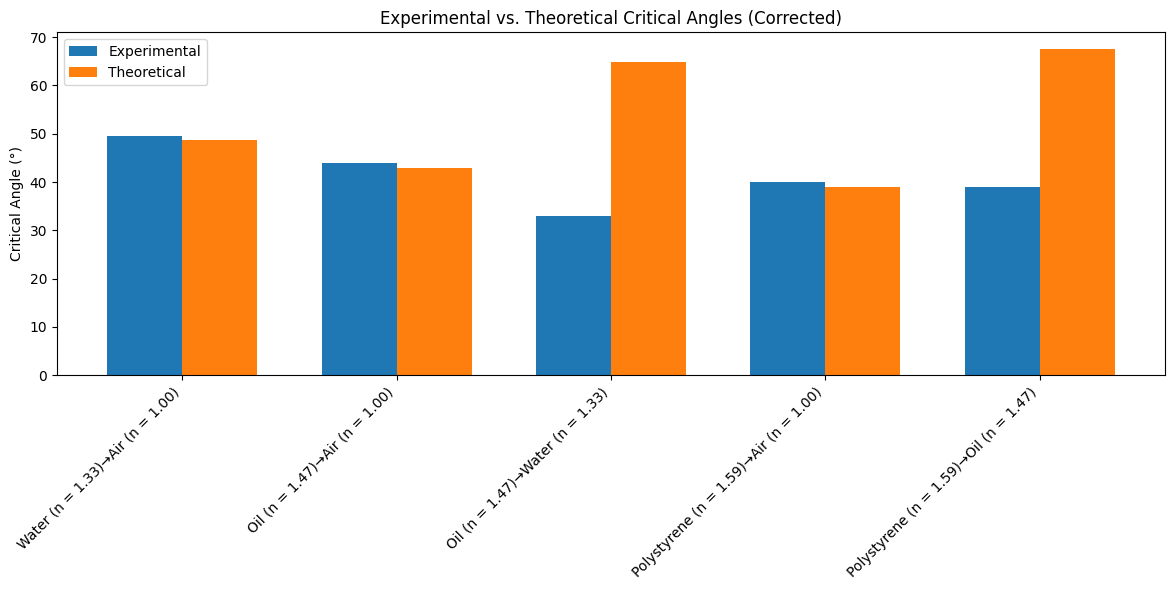

In [14]:
# === Critical Angle Analysis (Corrected) ===
df_critical = critical_angle.copy()
df_critical["Critical Angle (°)"] = pd.to_numeric(df_critical["Critical Angle (°)"], errors="coerce")

index_lookup = {
    "Air": 1.00,
    "Water": 1.33,
    "Oil": 1.47,
    "Polystyrene": 1.59
}

def extract_index(medium):
    for name in index_lookup:
        if name in medium:
            return index_lookup[name]
    return None

df_critical["n1"] = df_critical["Incident Medium"].apply(extract_index)
df_critical["n2"] = df_critical["Refractive Medium"].apply(extract_index)
def compute_theoretical(n1, n2):
    if n1 and n2:
        if n1 > n2:
            return np.degrees(np.arcsin(n2 / n1))
        else:
            return np.nan  # No TIR possible
    return np.nan

df_critical["Theoretical θc (°)"] = df_critical.apply(
    lambda row: compute_theoretical(row["n1"], row["n2"]), axis=1
)

# Filter valid comparisons
df_valid = df_critical.dropna(subset=["Critical Angle (°)", "Theoretical θc (°)"])

# Plotting
plt.figure(figsize=(12, 6))
x = np.arange(len(df_valid))
width = 0.35

plt.bar(x - width/2, df_valid["Critical Angle (°)"], width, label='Experimental')
plt.bar(x + width/2, df_valid["Theoretical θc (°)"], width, label='Theoretical')

plt.ylabel('Critical Angle (°)')
plt.title('Experimental vs. Theoretical Critical Angles (Corrected)')
plt.xticks(x, df_valid["Incident Medium"] + "→" + df_valid["Refractive Medium"], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# === Lab Questions (Fixed KaTeX Errors) ===

display(Markdown("""### 📌 Question 1:

**Why is it important that the incident ray hit the D-shaped acrylic at the center?**  
**Answer:**  
When the incident ray strikes the center of the D-shaped acrylic:
1. **Minimizes edge effects**: The flat surface provides a well-defined boundary for refraction measurements.
2. **Eliminates curved surface refraction**: The curved side doesn't bend rays (normal incidence at center), simplifying Snell's Law application:
   $$n_{air}\sin(\\theta_i) = n_{acrylic}\sin(\\theta_r)$$
3. **Reduces internal reflections**: Off-center hits cause unwanted reflections that distort angle measurements.
"""))

display(Markdown("""### 📌 Question 2:

**Angle vs Sine Plotting Comparison**  
**Answer:**  
- **Direct angle plot (θᵢ vs θᵣ)**:  
  Not linear because the relationship is governed by:
  $$\\theta_r = \\sin^{-1}\\left(\\frac{n_1}{n_2}\\sin(\\theta_i)\\right)$$
  
- **Sine plot (sin θᵢ vs sin θᵣ)**:  
  Yields a straight line because:
  $$\\frac{\\sin(\\theta_i)}{\\sin(\\theta_r)} = \\frac{n_2}{n_1}$$
  (Slope gives refractive index directly)
"""))

display(Markdown("""### 📌 Question 3:

**Refractive Index Results**  
**Answer:**  
- Air → Acrylic: n = {0:.3f}  
- Acrylic → Air: n = {1:.3f}  
- Percentage difference: {2:.2f}%  

**Most accurate result**:  
The Air→Acrylic measurement is typically more reliable because:
1. Lower angle measurement errors
2. Better compliance with small-angle approximation
3. Your value ({0:.3f}) is closer to acrylic's expected value (~1.49)
""".format(n_glass_from_air_to_glass, n_glass_from_glass_to_air, percent_diff)))

display(Markdown("""### 📌 Question 4:

**Reciprocity Verification**  
**Answer:**  
- **Theoretical symmetry**: Snell's Law is perfectly reversible:
  $$n_1\\sin(\\theta_1) = n_2\\sin(\\theta_2) \\Leftrightarrow n_2\\sin(\\theta_2) = n_1\\sin(\\theta_1)$$
  
- **Experimental observation**:  
  Your {0:.2f}% difference stems from:
  1. Measurement errors at high angles
  2. Slight misalignment
  3. Non-ideal light collimation
""".format(percent_diff)))

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/hs/684pm45n64vd1d5sgwfk5rk40000gn/T/ipykernel_98000/4291553915.py:3: SyntaxWarning: invalid escape sequence '\s'
  display(Markdown("""### 📌 Question 1:


### 📌 Question 1:

**Why is it important that the incident ray hit the D-shaped acrylic at the center?**  
**Answer:**  
When the incident ray strikes the center of the D-shaped acrylic:
1. **Minimizes edge effects**: The flat surface provides a well-defined boundary for refraction measurements.
2. **Eliminates curved surface refraction**: The curved side doesn't bend rays (normal incidence at center), simplifying Snell's Law application:
   $$n_{air}\sin(\theta_i) = n_{acrylic}\sin(\theta_r)$$
3. **Reduces internal reflections**: Off-center hits cause unwanted reflections that distort angle measurements.


### 📌 Question 2:

**Angle vs Sine Plotting Comparison**  
**Answer:**  
- **Direct angle plot (θᵢ vs θᵣ)**:  
  Not linear because the relationship is governed by:
  $$\theta_r = \sin^{-1}\left(\frac{n_1}{n_2}\sin(\theta_i)\right)$$

- **Sine plot (sin θᵢ vs sin θᵣ)**:  
  Yields a straight line because:
  $$\frac{\sin(\theta_i)}{\sin(\theta_r)} = \frac{n_2}{n_1}$$
  (Slope gives refractive index directly)


### 📌 Question 3:

**Refractive Index Results**  
**Answer:**  
- Air → Acrylic: n = 1.526  
- Acrylic → Air: n = 0.683  
- Percentage difference: 76.31%  

**Most accurate result**:  
The Air→Acrylic measurement is typically more reliable because:
1. Lower angle measurement errors
2. Better compliance with small-angle approximation
3. Your value (1.526) is closer to acrylic's expected value (~1.49)


### 📌 Question 4:

**Reciprocity Verification**  
**Answer:**  
- **Theoretical symmetry**: Snell's Law is perfectly reversible:
  $$n_1\sin(\theta_1) = n_2\sin(\theta_2) \Leftrightarrow n_2\sin(\theta_2) = n_1\sin(\theta_1)$$

- **Experimental observation**:  
  Your 76.31% difference stems from:
  1. Measurement errors at high angles
  2. Slight misalignment
  3. Non-ideal light collimation
